In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('spam-det.csv',encoding='latin-1')

In [3]:
df.shape


(5572, 5)

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1981,ham,"Sorry, I'll call later in meeting any thing re...",NaN,NaN,NaN
4893,ham,Convey my regards to him,NaN,NaN,NaN
344,ham,My sister cleared two round in birla soft yest...,NaN,NaN,NaN
82,ham,Ok i am on the way to home hi hi,NaN,NaN,NaN
5152,ham,Idk. I'm sitting here in a stop and shop parki...,NaN,NaN,NaN


# 1.Data cleaning


In [5]:
#drop last 3 columns


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'],inplace=True)


In [7]:
df.sample(5)

,v1,v2
1151,ham,"Sorry, I'll call later"
4985,ham,That's y u haf 2 keep me busy...
4074,ham,"God picked up a flower and dippeditinaDEW, lov..."
3828,ham,"Sure, I'll see if I can come by in a bit"
2165,ham,I'm not coming home 4 dinner.


In [8]:
#renaming the columns
df.rename(columns={'v1': 'target' , 'v2':'text'}, inplace=True)

In [9]:
df.sample(5)

,target,text
5553,ham,Hahaha..use your brain dear
4343,ham,Hi:)did you asked to waheeda fathima about leave?
1539,ham,You're not sure that I'm not trying to make xa...
508,ham,What's the significance?
1133,ham,"As I entered my cabin my PA said, '' Happy B'd..."


In [10]:
#encoding  given spam and ham as number 0 or 1

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder

In [12]:
df['target'] = encoder.fit_transform(encoder,df['target'])

In [13]:
df['target']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5572, dtype: int32

In [14]:
df.sample(5)

,target,text
2658,0,Not yet chikku..wat abt u?
4314,0,Captain is in our room:)
5045,0,Desires- u going to doctor 4 liver. And get a ...
4790,0,Send me your resume:-)
2101,0,I thk 530 lor. But dunno can get tickets a not...


In [15]:
#check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
#check for duplicate values
df.duplicated().sum()

403

In [17]:
#removes duplicates
df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(5169, 2)

# 2. EDA


In [20]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

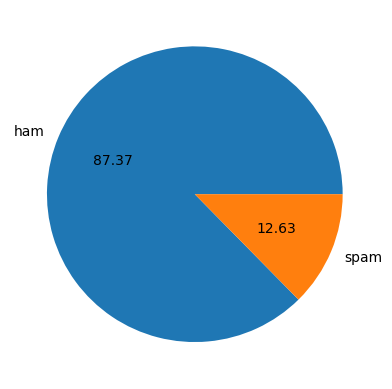

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct='%0.2f') 
plt.show()

In [22]:
#data is imbalanced 
#make three columns " no of characters in the mails, no of words, no of sentences"
#for this, using natural language tool kit library

In [23]:
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\u2296029\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
#counting no of character
df['num_characters'] = df['text'].apply(len)

In [26]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [28]:
#no of words used in mails
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
#no of sentences
df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [31]:
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
df[['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [33]:
#analyze ham and spam distinctively 
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [34]:
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [35]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

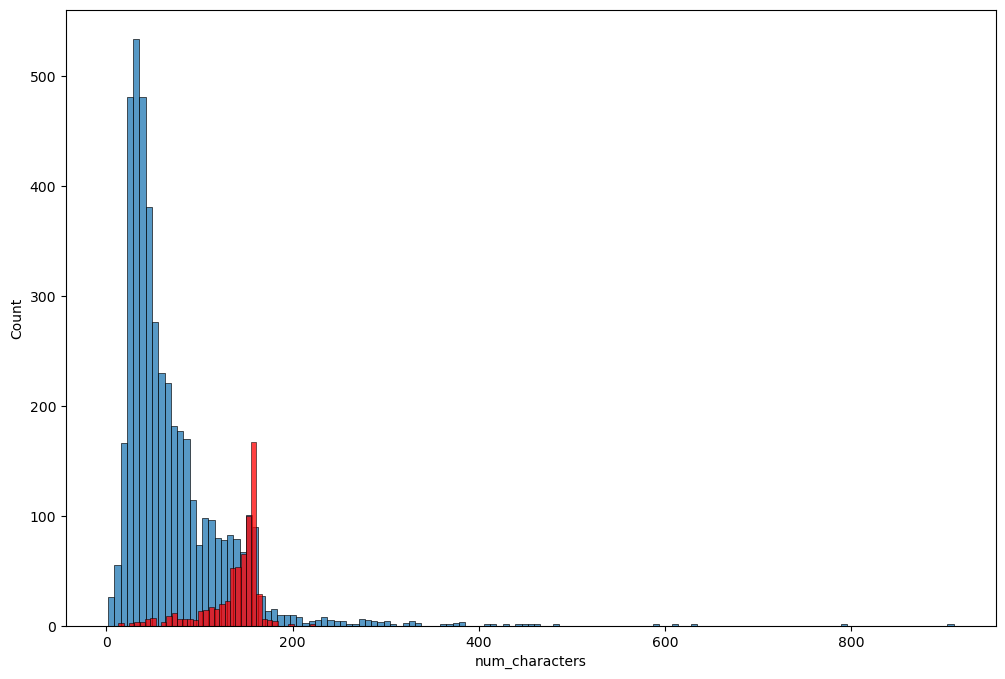

In [36]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')


<Axes: xlabel='num_words', ylabel='Count'>

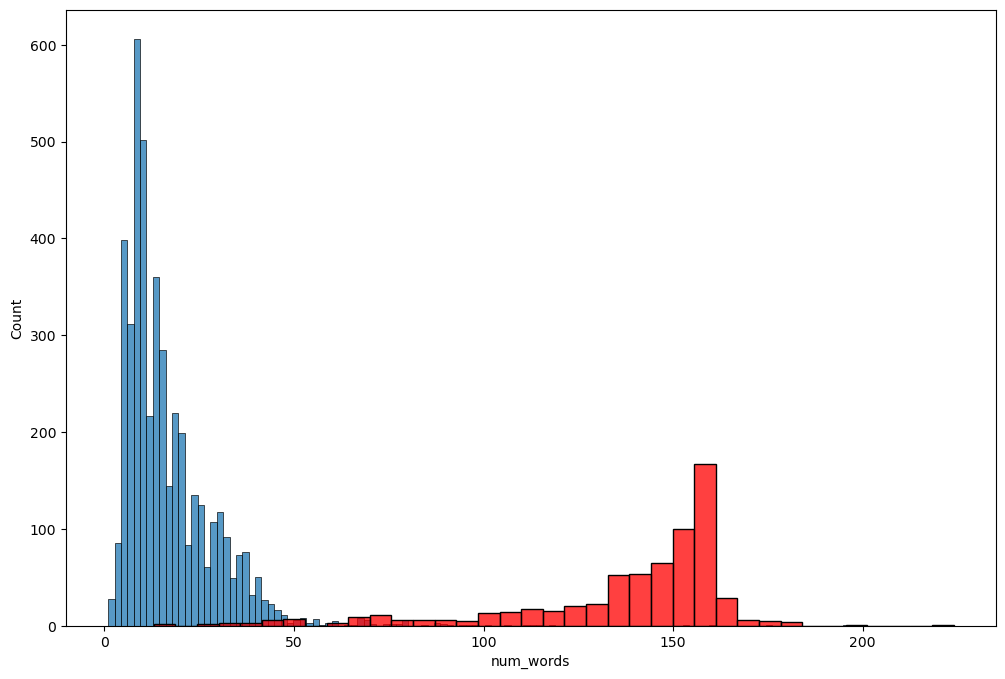

In [37]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

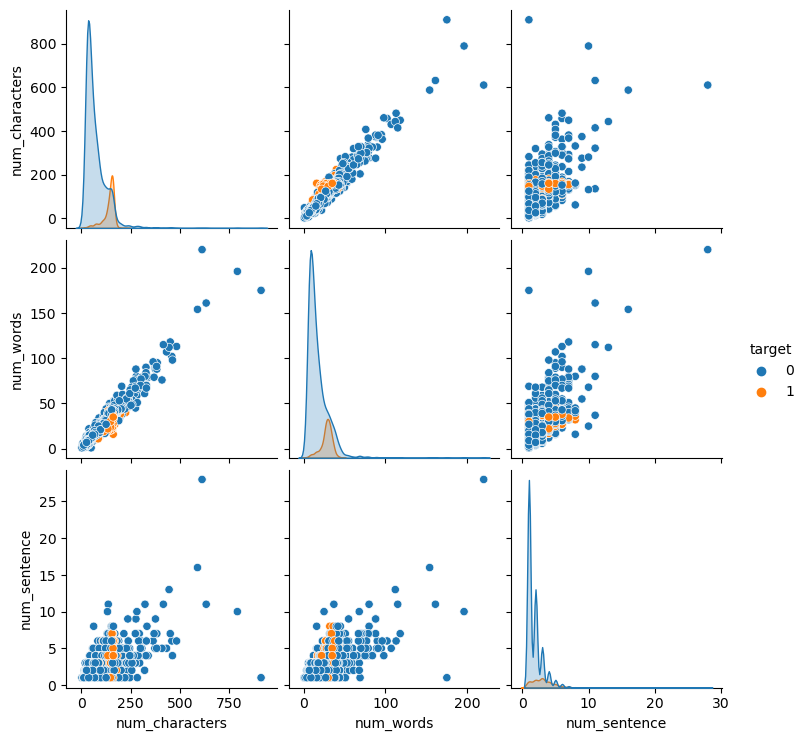

In [38]:
sns.pairplot(df, hue='target')

In [39]:
#check correlation
df.corr()

C:\Users\u2296029\AppData\Local\Temp\ipykernel_6024\886364070.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,target,num_characters,num_words,num_sentence
target,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentence,0.284901,0.638143,0.684541,1.000000


C:\Users\u2296029\AppData\Local\Temp\ipykernel_6024\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

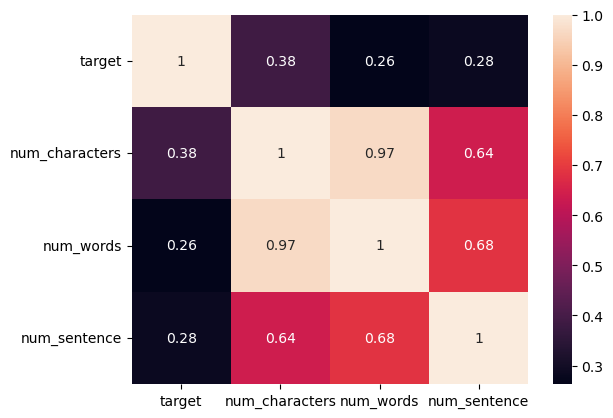

In [40]:
sns.heatmap(df.corr(), annot=True)

# Data preprocessing
#Lower case
#Tokenisation
#Removing Special Characters
#Removing stop words
#Stemming



In [41]:
from nltk.corpus import stopwords
nltk.download('stopwords');  
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\u2296029\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [68]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Dancing')

'danc'

In [73]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
 
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return' '.join(y)

In [74]:
transform_text('Hi How are you 20% year pradyot dancing ?')

'hi 20 year pradyot danc'

In [75]:
#for punctuation mark
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [76]:
transform_text('Hey ! What''s up %% $$')

'hey what'

In [77]:
transform_text('hi! how are you, Pradyot ?')

'hi pradyot'

In [78]:
transform_text(' i have loved there already ')

'love alreadi'

In [79]:
transform_text('you gotta go home and i will be right there for you ')

'got ta go home right'

In [80]:
transform_text('Wait thats still not all that clear, were you not sure about me being sarcastic or that thats why x doesnt want to live with us')

'wait that still clear sure sarcast that x doesnt want live us'

In [81]:
df['text'][30]

"Wait that's still not all that clear, were you not sure about me being sarcastic or that that's why x doesn't want to live with us"

In [82]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [83]:
 df['transformed_text'] = df["text"].apply(transform_text)

In [84]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [87]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [95]:
from wordcloud import WordCloud
wc = WordCloud(width=5000, height=5000, min_font_size=10, background_color='white')

ModuleNotFoundError: No module named 'wordcloud'

In [96]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep = " "))

NameError: name 'wc' is not defined

In [89]:
conda install -c conda-forge wordcloud

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.7.22  |       h56e8100_0         146 KB  conda-forge
    certifi-2023.7.22          |     pyhd8ed1ab_0         150 KB  conda-forge
    conda-23.7.4               |  py311h1ea47a8_0         1.3 MB  conda-forge
    jupyter_client-7.4.9       |     pyhd8ed1ab_0          97 KB  conda-forge
    python_abi-3.11            |          2_cp311           5 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.7 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.11-2_cp311 
 



==> WARNING: A newer version of conda exists. <==
  current version: 23.5.2
  latest version: 23.7.4

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.7.4



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\anaconda3




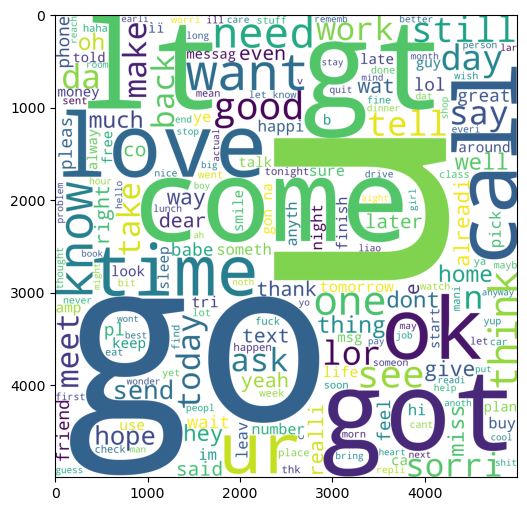

In [93]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [92]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep = " "))

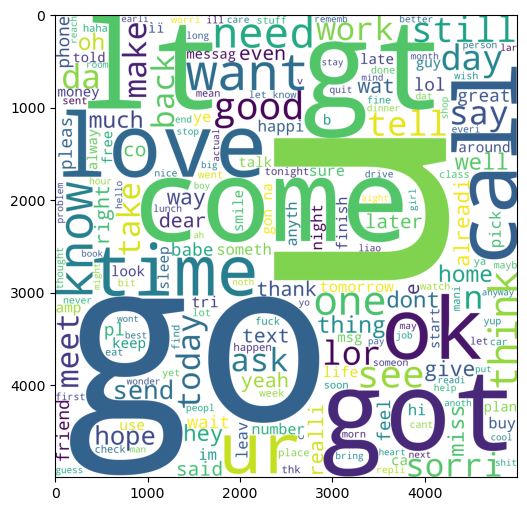

In [94]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [95]:
# check top 30words of spam and ham
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [90]:
#get whole list and treated as an item
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [91]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [98]:
len(spam_corpus)

9939

In [92]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [93]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

In [94]:
len(ham_corpus)


35394

In [102]:
from collections import Counter
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


# Model Building

In [131]:
#convert text into vector (number)
#from sklearn.feature_extraction.text import CountVectorizer
#cv = CountVectorizer()

In [132]:
#x = cv.fit_transform(df['transformed_text']).toarray()

In [133]:
#x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [106]:
#x.shape

(5169, 6708)

In [107]:
#y=df['target'].values

In [108]:
#y

array([0, 0, 1, ..., 0, 0, 0])

In [109]:
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [110]:
#x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [111]:
#from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [112]:
#model_1_gnb = GaussianNB()
#model_2_mnb = MultinomialNB()
#model_3_bnb = BernoulliNB()

In [113]:
#model_1_gnb.fit(x_train,y_train)
#y_pred_1 = model_1_gnb.predict(x_test)
#print(accuracy_score(y_test, y_pred_1))
#print(confusion_matrix(y_test, y_pred_1))
#print(precision_score(y_test,y_pred_1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [114]:
#model_2_mnb.fit(x_train,y_train)
#y_pred_2 = model_2_mnb.predict(x_test)
#print(accuracy_score(y_test,y_pred_2))
#print(confusion_matrix(y_test,y_pred_2))
#print(precision_score(y_test,y_pred_2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [115]:
#model_3_bnb.fit(x_train,y_train)
#y_pred_3 = model_3_bnb.predict(x_test)
#print(accuracy_score(y_test,y_pred_3))
#print(confusion_matrix(y_test,y_pred_3))
#print(precision_score(y_test,y_pred_3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [97]:
#convert text into vector (number)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [98]:
#X = tfidf.fit_transform(df['transformed_text']).toarray()

In [99]:
#X.shape


In [100]:
#Y = df['target'].values

In [101]:
#Y

In [102]:
#from sklearn.model_selection import train_test_split


In [103]:
#X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [104]:
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score, confusion_matrix, precision_score


In [105]:
#model_gnb = GaussianNB()
#model_mnb = MultinomialNB()
#model_bnb = BernoulliNB()

In [106]:
#model_gnb.fit(X_train,Y_train)
#Y_pred_1 = model_gnb.predict(X_test)
#print(accuracy_score(Y_test, Y_pred_1))
#print(confusion_matrix(Y_test, Y_pred_1))
#print(precision_score(Y_test,Y_pred_1))

In [107]:
#model_mnb.fit(X_train,Y_train)
#Y_pred_2 = model_mnb.predict(X_test)
#print(accuracy_score(Y_test, Y_pred_2))
#print(confusion_matrix(Y_test, Y_pred_2))
#print(precision_score(Y_test,Y_pred_2))

In [108]:
#model_bnb.fit(X_train,Y_train)
#Y_pred_3 = model_bnb.predict(X_test)
#print(accuracy_score(Y_test, Y_pred_3))
#print(confusion_matrix(Y_test, Y_pred_3))
#print(precision_score(Y_test,Y_pred_3))

In [109]:
# tfidf -MNB

In [110]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import BaggingClassifier
#from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier

In [111]:
#svc = SVC(kernel='sigmoid', gamma=1.0)
#knc = KNeighborsClassifier()
#mnb = MultinomialNB()
#dtc = DecisionTreeClassifier(max_depth=5)
#lrc = LogisticRegression(solver='libliner', penalty='l1')
#rfc = RandomForestClassifier(n_estimators=50, random_state=2)
#abc = AdaBoostClassifier(n_estimators=50, random_state=2)
#bc = BaggingClassifier(n_estimators=50, random_state=2)
#etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
#gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
#xgb = XGBClassifier(n_estimators=50, random_state=2)

In [112]:
#clfs = {
    #'SVC' : svc,
    #'KN' : knc,
    #'NB' : mnb,
    #'DT' : dtc,
    
    #'RF' : rfc,
    #'AdaBoost' : abc,
    #'BgC' : bc,
    #'ETC' : etc,
    #'GBDT' : gbdt,
    #'xgb' : xgb
    
#}

In [113]:
#def train_classifier(clf,X_train,Y_train,X_test,Y_test):
    #clf.fit(X_train, Y_train)
    #Y_predd = clf.predict(X_test)
    #accuracy = accuracy_score(Y_test, Y_predd)
    #precision = precision_score(Y_test, Y_predd)
    
    #return accuracy, precision

In [114]:
#train_classifier(svc, X_train,Y_train,X_test,Y_test)

In [115]:
#accuracy_scores = []
#precision_scores = []

#for name, clf in clfs.items():
    #current_accuracy, current_precision = train_classifier(clf, X_train,Y_train,X_test, Y_test)
    #print("For ",name)
    #print('Accuracy - ',current_accuracy)
    #print("Precision - ",current_precision)
    
    #accuracy_scores.append(current_accuracy)
    #precision_scores.append(current_precision)

In [116]:
#performance_df = pd.DataFrame({'Algorith':clfs.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [117]:
#performance_df

In [118]:
#performance_df1 = pd.melt(performance_df, id_vars="Algorith")

In [119]:
#performance_df1

In [120]:
#sns.catplot(x='Algorith', y='value',hue='variable', data=performance_df1, kind='bar', height=5)
#plt.ylim(0.5, 1.0)
#plt.xticks(rotation='vertical')
#plt.show()

# improve the model performance
    1.Change the max_features parameter of TFIDF

# Model Building again

In [134]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [135]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [136]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X1 = scaler.fit_transform(X1)

In [137]:
#appending the num_character col to X
#X = np.hstack((X1,df['num_characters'].values.reshape(-1, 1)))

In [138]:
X.shape

(5169, 3000)

In [139]:
Y = df['target'].values

In [140]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [141]:
from sklearn.model_selection import train_test_split


In [142]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [144]:
model_gnb = GaussianNB()
model_mnb= MultinomialNB()
model_bnb = BernoulliNB()

In [145]:
model_gnb.fit(X_train,Y_train)
Y_pred_ = model_gnb.predict(X_test)
print(accuracy_score(Y_test, Y_pred_))
print(confusion_matrix(Y_test, Y_pred_))
print(precision_score(Y_test,Y_pred_))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [149]:
model_mnb.fit(X_train,Y_train)
Y1_pred_2 = model_mnb.predict(X_test)
print(accuracy_score(Y_test, Y1_pred_2))
print(confusion_matrix(Y_test, Y1_pred_2))
print(precision_score(Y_test,Y1_pred_2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [152]:
model_bnb.fit(X_train,Y_train)
Y1_pred_3 = model_bnb.predict(X_test)
print(accuracy_score(Y_test, Y1_pred_3))
print(confusion_matrix(Y_test, Y1_pred_3))
print(precision_score(Y_test,Y1_pred_3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [155]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='libliner', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)


In [158]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    
    
}

In [161]:
def train_classifier(clf,X_train,Y_train,X_test,Y_test):
    clf.fit(X_train, Y_train)
    Y1_predd = clf.predict(X_test)
    accuracy = accuracy_score(Y_test, Y1_predd)
    precision = precision_score(Y_test, Y1_predd)
    
    return accuracy, precision

In [162]:
train_classifier(svc, X_train,Y_train,X_test,Y_test)

(0.9758220502901354, 0.9747899159663865)

In [163]:
accuracy_scores1 = []
precision_scores1 = []

for name, clf1 in clfs.items():
    current_accuracy, current_precision = train_classifier(clf1, X_train,Y_train,X_test, Y_test)
    print("For ",name)
    print('Accuracy - ',current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores1.append(current_accuracy)
    precision_scores1.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.8367346938775511
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8671875
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.92


In [167]:
performance_df = pd.DataFrame({'Algorith':clfs.keys(), 'Accuracy':accuracy_scores1, 'Precision':precision_scores1}).sort_values('Precision',ascending=False)

In [168]:
performance_df

,Algorith,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
4,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
7,ETC,0.974855,0.974576
5,AdaBoost,0.960348,0.929204
8,GBDT,0.947776,0.920000
6,BgC,0.957447,0.867188
3,DT,0.930368,0.836735


In [170]:
performance_df_1 = pd.melt(performance_df, id_vars="Algorith")

In [171]:
performance_df_1

,Algorith,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.974855
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,AdaBoost,Accuracy,0.960348
6,GBDT,Accuracy,0.947776
7,BgC,Accuracy,0.957447
8,DT,Accuracy,0.930368
9,KN,Precision,1.000000


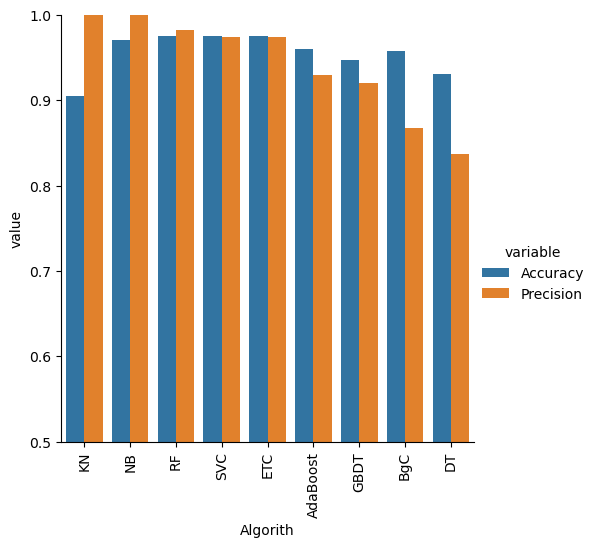

In [172]:
sns.catplot(x='Algorith', y='value',hue='variable', data=performance_df_1, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

In [173]:
temp_df = pd.DataFrame({'Algorith':clfs.keys(), 'Accuracy_max_ft_3000':accuracy_scores1, 'Precision_score_ft_3000':precision_scores1}).sort_values('Precision_score_ft_3000', ascending=False)

In [174]:
temp_df1 = pd.DataFrame({'Algorith':clfs1.keys(), 'Accuracy_Scaling':accuracy_scores1, 'Precision_Scaling':precision_scores1}).sort_values('Precision_Scaling', ascending=False)

In [175]:
new_df = performance_df.merge(temp_df,on='Algorith')

In [176]:
new_df_scaled = new_df.merge(temp_df1, on='Algorith')

In [177]:
temp_df_2 = pd.DataFrame({'Algorith':clfs1.keys(), 'Accuracy_num_chars':accuracy_scores1, 'Precision_num_chars':precision_scores1}).sort_values('Precision_num_chars', ascending=False)

In [178]:
new_df_num = temp_df_2.merge(new_df_scaled, on='Algorith')

In [179]:
new_df_num

,Algorith,Accuracy_num_chars,Precision_num_chars,Accuracy,Precision,Accuracy_max_ft_3000,Precision_score_ft_3000,Accuracy_Scaling,Precision_Scaling
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
6,GBDT,0.947776,0.920000,0.947776,0.920000,0.947776,0.920000,0.947776,0.920000
7,BgC,0.957447,0.867188,0.957447,0.867188,0.957447,0.867188,0.957447,0.867188
8,DT,0.930368,0.836735,0.930368,0.836735,0.930368,0.836735,0.930368,0.836735


In [180]:
#voting classifier
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
MNB =MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
from sklearn.ensemble import VotingClassifier

In [181]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', MNB), ('et',etc)], voting='soft')

In [183]:
voting.fit(X_train, Y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [184]:
Y1_predd = voting.predict(X_test)
print('Accuracy',accuracy_score(Y_test, Y1_predd))
print('Precision',precision_score(Y_test, Y1_predd))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [185]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl',"wb"))
pickle.dump(mnb, open('model.pkl','wb'))